In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

# Understanding the Data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Mr-MeerMoazzam/Machine-Learning/main/FuelConsumptionData.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Data Exploration

In [4]:
#summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
new_df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
new_df.head(7)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232


Let's plot FUELCONSUMPTION_COMB values with respect to enginesize

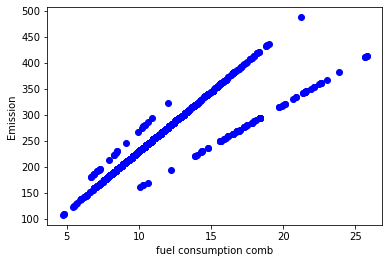

In [9]:
plt.scatter(new_df.FUELCONSUMPTION_COMB,new_df.CO2EMISSIONS,color='blue')
plt.xlabel("fuel consumption comb")
plt.ylabel("Emission")
plt.show()

# Creating train and test dataset

In [10]:
new_df.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'],
      dtype='object')

In [11]:
x = new_df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]

In [12]:
y = new_df['CO2EMISSIONS']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Train data distribution

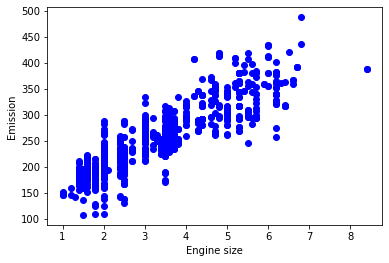

In [15]:
plt.scatter(x_train.ENGINESIZE,y_train,color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Multiple Regerssion Model

In [16]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [17]:
#The coefficients
print('coefficients:', regr.coef_)
print('Intercep:',regr.intercept_)

coefficients: [9.70092608 7.21865637 7.25713083 2.11415154]
Intercep: 65.65608599685777


# Prediction

In [18]:
y_pred = regr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
#display
print("Mean absolute error:" +str(mae))
print("Mean suqred error:" +str(mse))
print("r2_score:" +str(score))

Mean absolute error:16.88485099339567
Mean suqred error:541.3934668998378
r2_score:0.8574710872789149
